<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# Logistic Regression on CROSS SELL PREDICTION

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  
**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing & Importing Libraries**](#Section3)<br>
 
**4.** [**Data Acquisition & Description**](#Section4)<br>

**5.** [**Data Pre-processing**](#Section5)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>

**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Introduction**
---
- Carewell Insurance is into Providing General Insurance Services. Over the years the organization has transformed from the traditional manual way of doing the business to a more technologically advanced method of doing the business.
- They are a leading Insurance Company with 1 million policyholders. They provide insurance in Life Insurance, Motor insurance, Health insurance, Travel insurance, Property insurance, Mobile insurance.
- They want to build a model to predict whether the current policyholders (customers) from the past year will also be interested in additional Vehicle Insurance provided by the company.
- They want to automate the prediction process based on their policyholder’s collected data.


---
<a name = Section2></a>
# **2. Problem Statement**

- The current process is a manual confirmation of whether the policyholder will be interested in a Vehicle Insurance Policy.
- This is very tedious and time-consuming as it needs to be repeated for every policyholder.
- The goal of this case study automate the process of predicting whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import classification_report
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

| Column Name | Description | 
| ------------- |:-------------                                            :|
| Id | Unique ID for the customer | 
| Gender | Gender of the customer | 
| Age | Age of the customer | 
| Driving_License | 0: Customer does not have DL, 1: Customer already has DL Region_Code: Unique code for the region of the customer | 
| Previously_Insured | 1: Customer already has Vehicle Insurance, 0: Customer doesn't have Vehicle Insurance | 
| Vehicle_Age | Age of the Vehicle | 
| Vehicle_Damage | 1 corresponds to Customer got his/her vehicle damaged in the past. 0: Customer didn't get his/her vehicle damaged in the past | 
| Annual_Premium | The amount customer needs to pay as a premium in the year | 
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc | 
| Vintage | Number of Days, Customer has been associated with the company | 
| Response | 1: Customer is interested, 0: Customer is not interested | 


In [2]:
train_data = pd.read_csv("D:\\Insaid\\Machine Learning\\Term_Project\\Dataset\\Cross Sell Prediction\\train_data.csv")
test_data = pd.read_csv("D:\\Insaid\\Machine Learning\\Term_Project\\Dataset\\Cross Sell Prediction\\test_data.csv")

In [3]:
train_data.shape

(300000, 12)

In [4]:
train_data.Response.value_counts()

0    263119
1     36881
Name: Response, dtype: int64

In [5]:
test_data.shape

(81109, 11)

In [6]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00000,0,> 2 Years,Yes,40454.00000,26.00000,217,1
1,2,Male,76,1,3.00000,0,1-2 Year,No,33536.00000,26.00000,183,0
2,3,Male,47,1,28.00000,0,> 2 Years,Yes,38294.00000,26.00000,27,1
3,4,Male,21,1,11.00000,1,< 1 Year,No,28619.00000,152.00000,203,0
4,5,Female,29,1,41.00000,1,< 1 Year,No,27496.00000,152.00000,39,0


## Data Information

In [7]:
train_data.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 73.9 MB


- No Null Value

## Data Statistics

In [8]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000,300000.00000
mean,150000.50000,38.81584,0.99786,26.38218,0.45795,30534.31212,112.11800,154.32384,0.12294
std,86602.68472,15.49570,0.04617,13.23243,0.49823,17247.47589,54.14165,83.64369,0.32837
min,1.00000,20.00000,0.00000,0.00000,0.00000,2630.00000,1.00000,10.00000,0.00000
25%,75000.75000,25.00000,1.00000,15.00000,0.00000,24388.00000,29.00000,82.00000,0.00000
50%,150000.50000,36.00000,1.00000,28.00000,0.00000,31642.00000,133.00000,154.00000,0.00000
75%,225000.25000,49.00000,1.00000,35.00000,1.00000,39360.25000,152.00000,227.00000,0.00000
max,300000.00000,85.00000,1.00000,52.00000,1.00000,540165.00000,163.00000,299.00000,1.00000


- The policy holder Minimum age is 20  
- Average 38 to 39 year old customers
- Annual Premium starting from 2630 and Maximum Annual Premium is 540165

In [9]:
train_data.skew()

id                       0.00000
Age                      0.67339
Driving_License        -21.56445
Region_Code             -0.11494
Previously_Insured       0.16881
Annual_Premium           1.85718
Policy_Sales_Channel    -0.90382
Vintage                  0.00396
Response                 2.29663
dtype: float64

In [10]:
train_data.Driving_License.unique()

array([1, 0], dtype=int64)

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [11]:
profile = ProfileReport(df = train_data)
profile.to_file(output_file = 'Train Data Pre Profiling Report.html')
print('Accomplished!')

- No Duplicate Rows
- No Missing Values


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

### *Heat Map*

Text(0.5, 1.0, 'Correlation Between Feature')

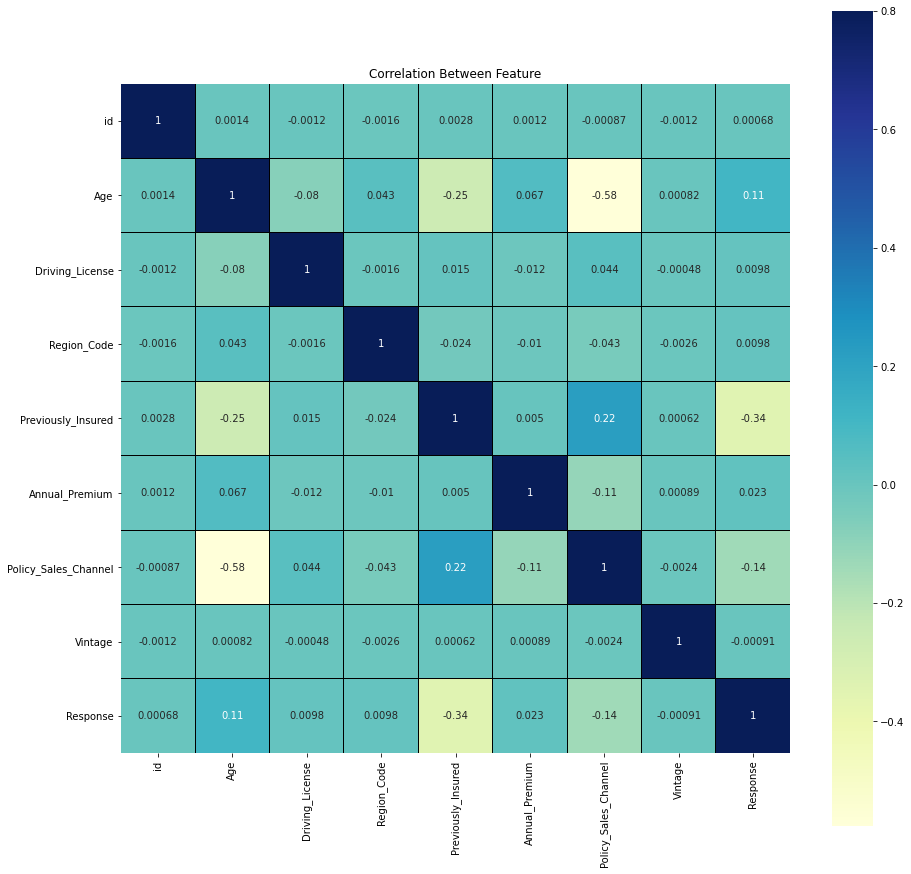

In [12]:
corr = train_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr , vmax=0.8 , linewidths=.01 , square=True , annot=True , cmap='YlGnBu',linecolor ='black')
plt.title('Correlation Between Feature')

- Previously Insured and Response are Negatively Correlated
- Policay Sales Channel & Response also Negatively Correlated
- Positive Correlation Between Age & Response
- Negative Relation Between Age & Policy Sales Channel

**Question: Analysis to the Maximum Number of Customer From Which Age Group**

In [13]:
age_key=train_data.Age.value_counts().head(5).keys()
age_value=train_data.Age.value_counts().head(5).values
print(age_key)
print(age_value)

Int64Index([24, 23, 22, 25, 21], dtype='int64')
[20435 18991 16479 16081 12963]


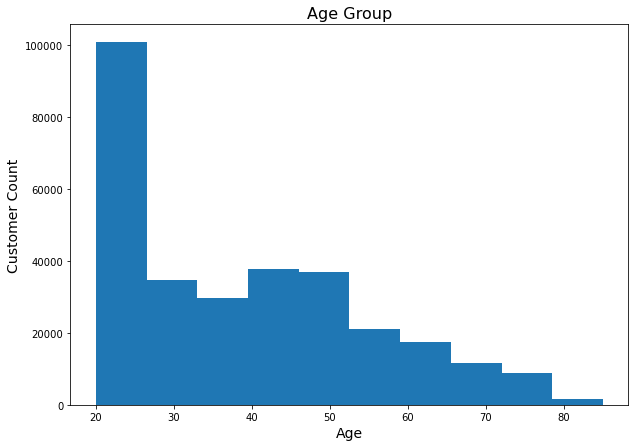

In [14]:
plt.figure(figsize=[10,7])
plt.hist(train_data.Age)
plt.xlabel("Age" , size = 14)
plt.ylabel("Customer Count" ,size = 14)
plt.title("Age Group" , size = 16)


plt.show()

- Above Graph Showing the Maximum Customer From 20-25 Age Group
- Then From 26-50 Age Group Customer  

**Question:How Does Age is Matter to the Response Feature**

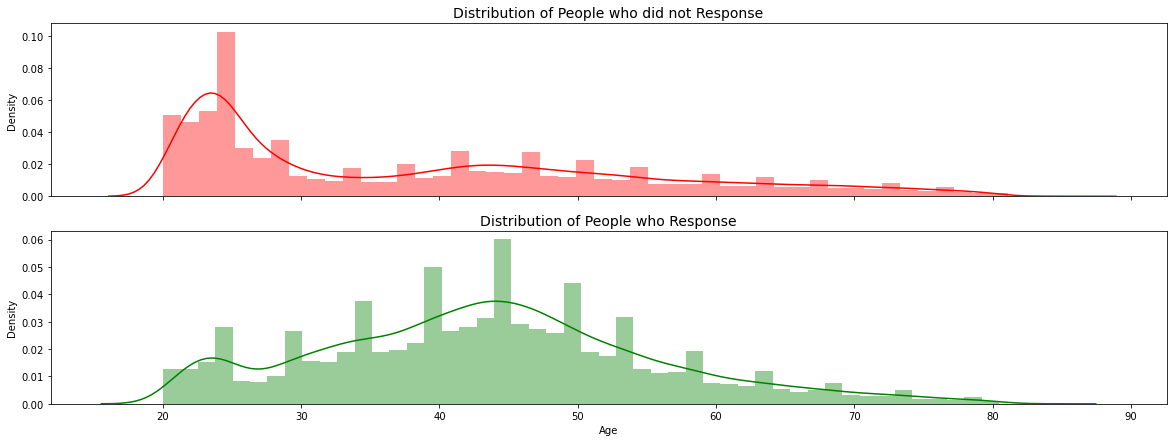

In [15]:
Not_Response = train_data['Age'][train_data['Response'] == 0]

Response = train_data['Age'][train_data['Response'] == 1]

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))

sns.distplot(a = Not_Response, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of People who did not Response', size = 14)

ax1.set_xlabel(xlabel = '')
sns.distplot(a = Response, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of People who Response', size = 14)

plt.show()

- Mostly Age Group 20-28 was not Responed
- Mostly High number of response from Age Group 39-50

**Question: Calculating Vehical Damage Rate?**

<AxesSubplot:ylabel='Vehicle_Damage'>

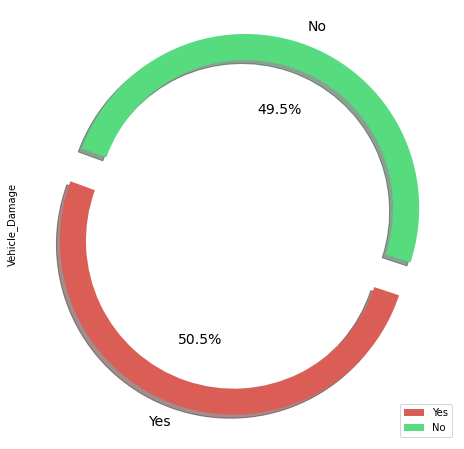

In [16]:
space = np.ones(2)/10
train_data['Vehicle_Damage'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%',
                                             wedgeprops = dict(width=0.15), shadow = True, startangle = 160,
                                                 figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])

- Above 50% Customer Damage thier Vehical in Past


### **Pair Plot**

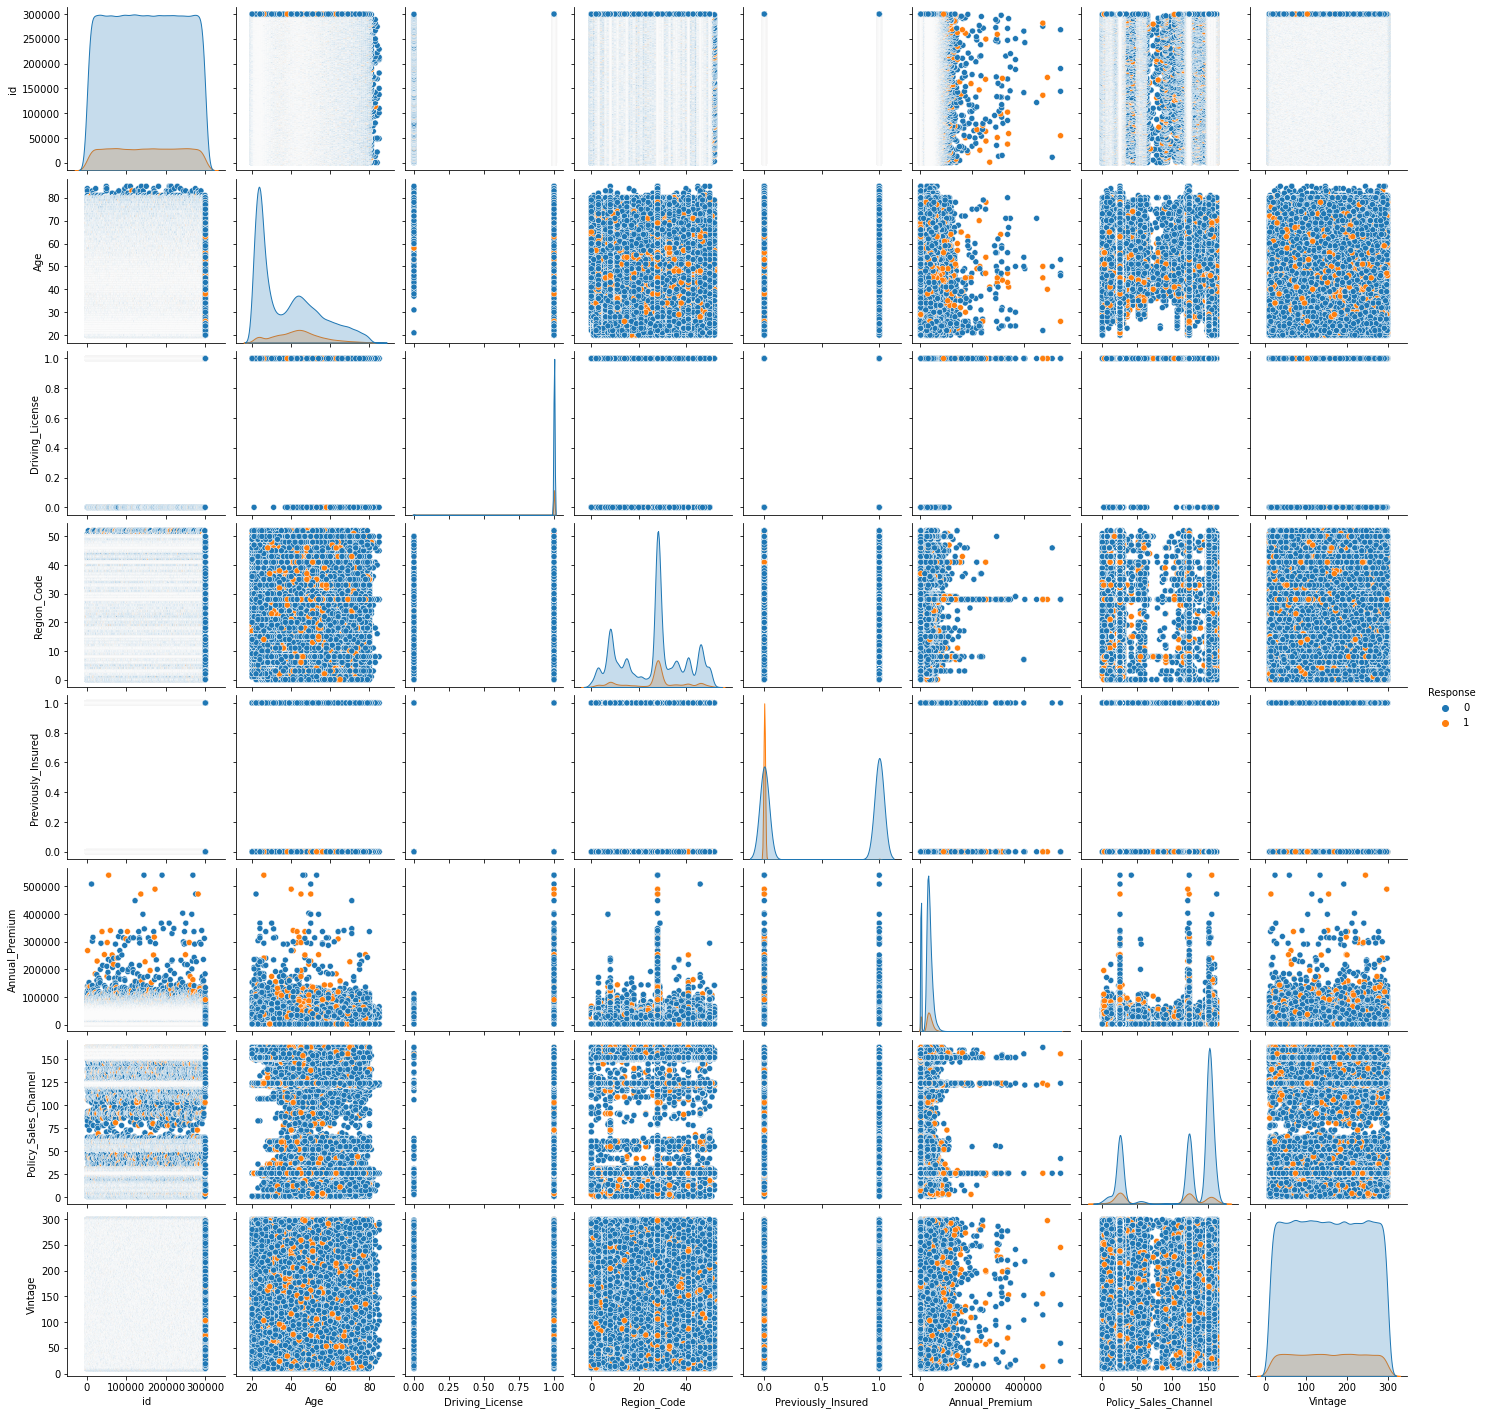

In [59]:
sns.pairplot(train_data , diag_kind='kde' , hue="Response")

<a name = Section7></a>

---
# **7. Post Data Processing**
---

In [17]:
train_data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [18]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00000,0,> 2 Years,Yes,40454.00000,26.00000,217,1
1,2,Male,76,1,3.00000,0,1-2 Year,No,33536.00000,26.00000,183,0
2,3,Male,47,1,28.00000,0,> 2 Years,Yes,38294.00000,26.00000,27,1
3,4,Male,21,1,11.00000,1,< 1 Year,No,28619.00000,152.00000,203,0
4,5,Female,29,1,41.00000,1,< 1 Year,No,27496.00000,152.00000,39,0


In [19]:
new_train_data = train_data.drop(['id'] , axis=1)

In [20]:
X = new_train_data.iloc[:,:-1]
y=new_train_data.Response

X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.00000,0,> 2 Years,Yes,40454.00000,26.00000,217
1,Male,76,1,3.00000,0,1-2 Year,No,33536.00000,26.00000,183
2,Male,47,1,28.00000,0,> 2 Years,Yes,38294.00000,26.00000,27
3,Male,21,1,11.00000,1,< 1 Year,No,28619.00000,152.00000,203
4,Female,29,1,41.00000,1,< 1 Year,No,27496.00000,152.00000,39


### **Split Data Into Train & Test**

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.20 , random_state=123)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240000, 10)
(60000, 10)
(240000,)
(60000,)


### **Encoding The Feature**

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lc = LabelEncoder()

In [25]:
X_train['Gender'] = lc.fit_transform(X_train['Gender'])
X_train['Vehicle_Age'] = lc.fit_transform(X_train['Vehicle_Age'])
X_train['Vehicle_Damage'] = lc.fit_transform(X_train['Vehicle_Damage'])

In [26]:
X_test['Gender'] = lc.fit_transform(X_test['Gender'])
X_test['Vehicle_Age'] = lc.fit_transform(X_test['Vehicle_Age'])
X_test['Vehicle_Damage'] = lc.fit_transform(X_test["Vehicle_Damage"])

### **Satandardization The Dataset**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

## **Logistic Regression - Baseline Model**

In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(scaled_X_train , y_train)

LogisticRegression()

## **Logistic Regression Model Evaluation**

In [32]:
print("Accuracy for Training dataset :-",logreg.score(scaled_X_train , y_train))

Accuracy for Training dataset :- 0.8774916666666667


In [33]:
print("Accuracy for Testing dataset :-",logreg.score(scaled_X_test , y_test))

Accuracy for Testing dataset :- 0.87535


In [34]:
predict = logreg.predict(scaled_X_test)

### Checking Confusion Matrix

In [35]:
print(confusion_matrix(y_test , predict))
print(classification_report(y_test , predict))

[[52521     0]
 [ 7479     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     52521
           1       0.00      0.00      0.00      7479

    accuracy                           0.88     60000
   macro avg       0.44      0.50      0.47     60000
weighted avg       0.77      0.88      0.82     60000



## **Checking Accuracy**

In [36]:
print('Accuracy score for test data is:', accuracy_score(y_test,predict))

Accuracy score for test data is: 0.87535


- From Above Observation it is imbalance dataset, where the target class has an uneven distribution of observations
- That case we add some dummy data in our dataset
- So, We use SMOTE for adding dummy data in dataset

## **Apply SMOTE**

**Before Implimantation**

In [37]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (240000, 10) (240000,)
Testing Data Shape: (60000, 10) (60000,)


### **Implimenting SMOTE**

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(random_state=123)

In [40]:
X['Gender'] = lc.fit_transform(X['Gender'])
X['Vehicle_Age'] = lc.fit_transform(X['Vehicle_Age'])
X['Vehicle_Damage'] = lc.fit_transform(X['Vehicle_Damage'])

In [41]:
X1 , y1 =sm.fit_resample(X , y)

In [42]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X1 , y1 , test_size=0.20 ,random_state=123 , stratify = y1)

## **After Implimantation**

In [43]:
print('Training Data Shape:', X1_train.shape, y1_train.shape)
print('Testing Data Shape:', X1_test.shape, y1_test.shape)

Training Data Shape: (420990, 10) (420990,)
Testing Data Shape: (105248, 10) (105248,)


## **Standardization of New Dataset**

In [44]:
scaled_X1_train = sc.fit_transform(X1_train)
scaled_X1_test = sc.fit_transform(X1_test)

## **Model Evaluation**

In [45]:
logreg.fit(scaled_X1_train , y1_train)

LogisticRegression()

In [46]:
print("Training Accuracy")
print(logreg.score(scaled_X1_train , y1_train))
print("Testing Accuracy")
print(logreg.score(scaled_X1_test , y1_test))

Training Accuracy
0.7873274899641322
Testing Accuracy
0.7885755548799027


In [47]:
predict1 = logreg.predict(scaled_X1_test)

In [48]:
print(confusion_matrix(y1_test , predict1))
print(classification_report(y1_test , predict1))

[[34952 17672]
 [ 4580 48044]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.76     52624
           1       0.73      0.91      0.81     52624

    accuracy                           0.79    105248
   macro avg       0.81      0.79      0.79    105248
weighted avg       0.81      0.79      0.79    105248



**Observations** 
- True Positive(TP) = 48044
- True Negative(TN) = 34952
- False Positive(FP) = 17672
- False Negative(FN) = 4580

## **Checking Accuracy**

In [49]:
print('Accuracy score for test data is:', accuracy_score(y1_test,predict1))

Accuracy score for test data is: 0.7885755548799027


## **Implement Our Model On Test Dataset**

In [50]:
test_data['Gender'] = lc.fit_transform(test_data['Gender'])
test_data['Vehicle_Age'] = lc.fit_transform(test_data['Vehicle_Age'])
test_data['Vehicle_Damage'] = lc.fit_transform(test_data['Vehicle_Damage'])

In [51]:
train = X1
test =test_data.drop(['id'] , axis=1)
target = y1

In [52]:
test_data.shape

(81109, 11)

In [53]:
logreg.fit(train , target)

LogisticRegression()

In [54]:
df =logreg.predict(test)

In [55]:
sample = pd.DataFrame(data=df , columns=['Response'])
sample.head()

,Response
0,0
1,0
2,0
3,1
4,1


In [56]:
col_id =pd.DataFrame(data=test_data.id)
col_id.head()

,id
0,300001
1,300002
2,300003
3,300004
4,300005


In [57]:
final_sample = pd.concat([col_id , sample], join = 'outer', axis = 1)
final_sample.head()

,id,Response
0,300001,0
1,300002,0
2,300003,0
3,300004,1
4,300005,1


In [58]:
final_sample.to_csv('D:\\Insaid\\Machine Learning\\Term_Project\\Dataset\\Cross Sell Prediction\\Submission.csv'
                    ,index=False , header=False)

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to policyholdr(Customer) Response and Not Response.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** the policyholder will be interested in a Vehicle Insurance Policy or Not